In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

COLOR = "black"
mpl.rcParams["text.color"] = "black"
mpl.rcParams["axes.labelcolor"] = COLOR
mpl.rcParams["xtick.color"] = COLOR
mpl.rcParams["ytick.color"] = COLOR

MC Run

In [3]:
import pickle

with open("2_saved_runs/df_scores_221118_v3.pickle", "rb") as handle:
    df_scores = pickle.load(handle)
with open("2_saved_runs/MC_run_221118_v2.pickle", "rb") as handle:
    results_mc = pickle.load(handle)
df_results, model_data = results_mc["df_results"], results_mc["model_data"]


In [4]:
df_scores.total_execution_time.mean()

3.961095155295619

In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
# cols = [ 'param_index', 'll', 'AIC', 'BIC', 'silhouette', 'll_rank', 'AIC_rank', 'BIC_rank',"TOTAL_rank", 'silhouette_rank',"CH_rank", 'identified_cluster', "N_cluster",'True_Cluster_number']
dataset = 10
init_routine = "random_inside"
criterion = "Total_rank_rank"

df_select = df_scores.loc[(df_scores.dataset == dataset) & (df_scores.init_routine == init_routine), :].sort_values(
    criterion
)
# df_select = df_select[df_select.identified_cluster == df_select.identified_cluster.max()]
print(f"best model: {int(df_select.number_identified_cluster.max())} identified clusters")
candidate_model_idx = df_select.groupby(["N_cluster"])[["model_idx"]].first().model_idx
df_candidates = df_select.loc[df_select.model_idx.isin(candidate_model_idx)]
df_candidates

best model: 1 identified clusters


,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank,number_identified_cluster,adjusted_rand_score
1841,1841,24,0.539623,0.539623,24,41,0,10,random_inside,3,1,55.845528,-43.845528,-40.455832,-56.210811,0.269184,17.437976,0.756424,1,21,21,32,6,34,18,115,1,1.0,0.0
1881,1881,15,0.742090,1.210385,25,81,1,10,random_inside,5,1,54.508221,-34.508221,-28.858727,-58.559522,0.150328,66.800860,0.744496,5,59,65,17,18,5,71,169,6,0.0,0.0
1874,1874,23,0.656213,0.656213,23,74,0,10,random_inside,4,1,52.851428,-36.851428,-32.331834,-54.229883,0.150328,66.800860,0.744496,9,50,51,48,18,5,72,181,7,0.0,0.0
1905,1905,34,1.592888,1.592888,34,105,0,10,random_inside,6,1,53.126605,-29.126605,-22.347213,-61.030176,0.150328,66.800860,0.744465,8,74,77,12,18,6,74,195,10,0.0,0.0
1925,1925,21,1.180155,1.180155,21,125,0,10,random_inside,7,1,53.976988,-25.976988,-18.067697,-69.882629,0.150328,66.800860,0.744471,6,90,97,1,18,5,73,217,15,0.0,0.0
1821,1821,5,0.159363,0.159363,5,21,0,10,random_inside,2,1,49.203749,-41.203749,-38.943951,-49.269429,0.287044,5.080646,0.757904,30,28,28,82,4,48,14,220,17,1.0,0.0
1802,1802,2,0.018183,0.018183,2,2,0,10,random_inside,1,1,48.877664,-44.877664,-43.747765,-46.177557,0.000000,0.000000,0.722918,33,1,1,111,35,55,138,236,22,1.0,1.0
1956,1956,10,0.847972,0.847972,10,156,0,10,random_inside,8,1,47.657832,-15.657832,-6.618642,-61.957023,0.116834,34.708655,0.738678,56,123,126,7,21,15,97,348,73,0.0,0.0
1977,1977,21,1.995528,1.995528,21,177,0,10,random_inside,9,1,47.376215,-11.376215,-1.207126,-68.729536,0.109777,50.025607,0.738595,59,132,142,2,23,9,104,367,77,0.0,0.0


In [6]:
df_select[df_select.number_identified_cluster == df_select.number_identified_cluster.max()].head(10)

,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank,number_identified_cluster,adjusted_rand_score
1841,1841,24,0.539623,0.539623,24,41,0,10,random_inside,3,1,55.845528,-43.845528,-40.455832,-56.210811,0.269184,17.437976,0.756424,1,21,21,32,6,34,18,115,1,1.0,0.0
1854,1854,14,0.495182,0.495182,14,54,0,10,random_inside,3,1,55.796090,-43.796090,-40.406393,-55.839161,0.269184,17.437976,0.756422,2,22,22,33,6,34,19,119,2,1.0,0.0
1844,1844,24,0.592131,0.592131,24,44,0,10,random_inside,3,1,55.794212,-43.794212,-40.404515,-55.764364,0.269184,17.437976,0.756422,3,23,23,35,6,34,20,124,3,1.0,0.0
1840,1840,43,0.805890,0.805890,43,40,0,10,random_inside,3,1,55.013760,-43.013760,-39.624063,-55.215646,0.269184,17.437976,0.756413,4,24,27,43,6,34,21,138,4,1.0,0.0
1856,1856,44,0.994392,0.994392,44,56,0,10,random_inside,3,1,51.848148,-39.848148,-36.458452,-52.155744,0.269184,17.437976,0.756377,10,29,29,60,6,34,22,168,5,1.0,0.0
1855,1855,18,0.514973,0.514973,18,55,0,10,random_inside,3,1,51.295374,-39.295374,-35.905677,-51.525601,0.269184,17.437976,0.756370,13,30,40,63,6,34,23,186,8,1.0,0.0
1851,1851,59,1.096715,1.096715,59,51,0,10,random_inside,3,1,50.483255,-38.483255,-35.093559,-50.549772,0.269184,17.437976,0.756361,16,33,44,72,6,34,24,205,11,1.0,0.0
1870,1870,25,0.889775,1.244029,34,70,1,10,random_inside,4,1,51.650794,-35.650794,-31.131199,-53.703051,0.269184,17.437976,0.756353,11,52,56,51,6,34,27,210,12,1.0,0.0
1852,1852,22,0.616012,0.616012,22,52,0,10,random_inside,3,1,50.361866,-38.361866,-34.972170,-50.828619,0.269184,17.437976,0.756360,17,42,45,68,6,34,25,212,13,1.0,0.0
1860,1860,35,0.796674,0.796674,35,60,0,10,random_inside,4,1,51.627760,-35.627760,-31.108165,-53.499526,0.269184,17.437976,0.756353,12,53,57,54,6,34,28,216,14,1.0,0.0


In [7]:
df_select[df_select.N_cluster == 6]

,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank,number_identified_cluster,adjusted_rand_score
1905,1905,34,1.592888,1.592888,34,105,0,10,random_inside,6,1,53.126605,-29.126605,-22.347213,-61.030176,0.150328,66.800860,0.744465,8,74,77,12,18,6,74,195,10,0.0,0.0
1908,1908,26,1.270684,1.270684,26,108,0,10,random_inside,6,1,50.781030,-26.781030,-20.001638,-59.611019,0.063728,32.341853,0.732203,14,82,90,16,28,17,125,247,26,0.0,0.0
1907,1907,14,0.850760,0.850760,14,107,0,10,random_inside,6,1,50.021313,-26.021313,-19.241920,-57.577002,0.109777,50.025607,0.738665,21,88,93,28,23,9,98,262,33,0.0,0.0
1902,1902,13,0.803277,0.803277,13,102,0,10,random_inside,6,1,47.359720,-23.359720,-16.580328,-56.469974,0.269184,17.437976,0.756271,60,100,101,31,6,34,37,332,66,1.0,0.0
1913,1913,13,0.758633,0.758633,13,113,0,10,random_inside,6,1,47.333212,-23.333212,-16.553820,-53.922062,0.109777,50.025607,0.738631,62,101,102,50,23,10,102,348,73,0.0,0.0
1919,1919,20,0.804755,0.804755,20,119,0,10,random_inside,6,1,46.433004,-22.433004,-15.653611,-54.454664,0.120444,21.943704,0.738484,75,102,103,47,20,22,113,369,78,0.0,0.0
1916,1916,8,0.534538,0.534538,8,116,0,10,random_inside,6,1,46.191015,-22.191015,-15.411623,-52.234874,-0.037810,68.217926,0.721680,84,104,104,59,38,4,160,393,84,0.0,0.0
1915,1915,12,0.820387,0.820387,12,115,0,10,random_inside,6,1,45.154882,-21.154882,-14.375490,-52.878237,0.269184,17.437976,0.756242,94,109,108,57,6,34,39,408,88,1.0,0.0
1904,1904,6,0.308194,0.308194,6,104,0,10,random_inside,6,1,43.291322,-19.291322,-12.511930,-51.225319,0.116834,34.708655,0.738661,112,113,113,65,21,15,99,439,96,0.0,0.0
1917,1917,10,0.756789,1.084247,15,117,1,10,random_inside,6,1,45.633719,-21.633719,-14.854327,-52.320646,-0.072669,15.485452,0.714769,89,106,105,58,45,38,174,441,98,1.0,0.0


In [8]:
from clustering.model_selection.multi_model_mimicry.multi_model_mimicry import MultiModelMimicryParameter

mmm_params = {
    "N_bs": 100,
    "criterion": "ll_score",
    "n_neighbors": 10,
    "pca_n_components": 2,
    
    "emc": {
        "parallel": {"n_jobs": 14, "verbose": 11},
        "cluster_init": {
            "init_routine": "random_inside",
            "routine": {
                "N_runs_per_clusternumber": 3,
                "N_max": 5000,
            },
        },
        "em": {
            "max_reiterations": 5000,
            "em_algorithm": {
                "em_tol": 1e-2,
                "max_iter": 1000,
                "min_mix_coef": 0.02,
            },
        },
    },
}

In [ ]:
from clustering.model_selection.multi_model_mimicry.multi_model_mimicry import MultiModelMimicry
mmm = MultiModelMimicry(df_scores, model_data, **mmm_params)
mmm.select_candidate_models(list(df_candidates.iloc[:3].model_idx)) #best for results
mmm.run()

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=14)]: Done   2 tasks      | elapsed:    5.6s
[Parallel(n_jobs=14)]: Done   3 tasks      | elapsed:    5.8s
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:    5.8s
[Parallel(n_jobs=14)]: Done   5 tasks      | elapsed:    5.8s
[Parallel(n_jobs=14)]: Done   6 tasks      | elapsed:    5.8s
[Parallel(n_jobs=14)]: Done   7 tasks      | elapsed:    5.8s
[Parallel(n_jobs=14)]: Done   8 tasks      | elapsed:    5.9s
[Parallel(n_jobs=14)]: Done   9 tasks      | elapsed:    6.1s
[Parallel(n_jobs=14)]: Done  10 tasks      | elapsed:    6.2s
[Parallel(n_jobs=14)]: Done  11 tasks      | elapsed:    6.2s
[Parallel(n_jobs=14)]: Done  12 tasks      | elapsed:    6.3s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:    6.4s
[Parallel(n_jobs=14)]: Done  14 tasks      | elapsed:    6.5s
[Parallel(n_jobs=14)]: Done  15 tasks      | elapsed:  

In [ ]:
print(f"{tuple(mmm.predict_model())}")
print(f"{tuple(mmm.knn_model_probabilities[0])}")
print(f"{tuple(mmm.candidate_model_idxs)}")


('data_model_2024',)
(0.0, 0.8, 0.2)
(2006, 2024, 2042)


c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


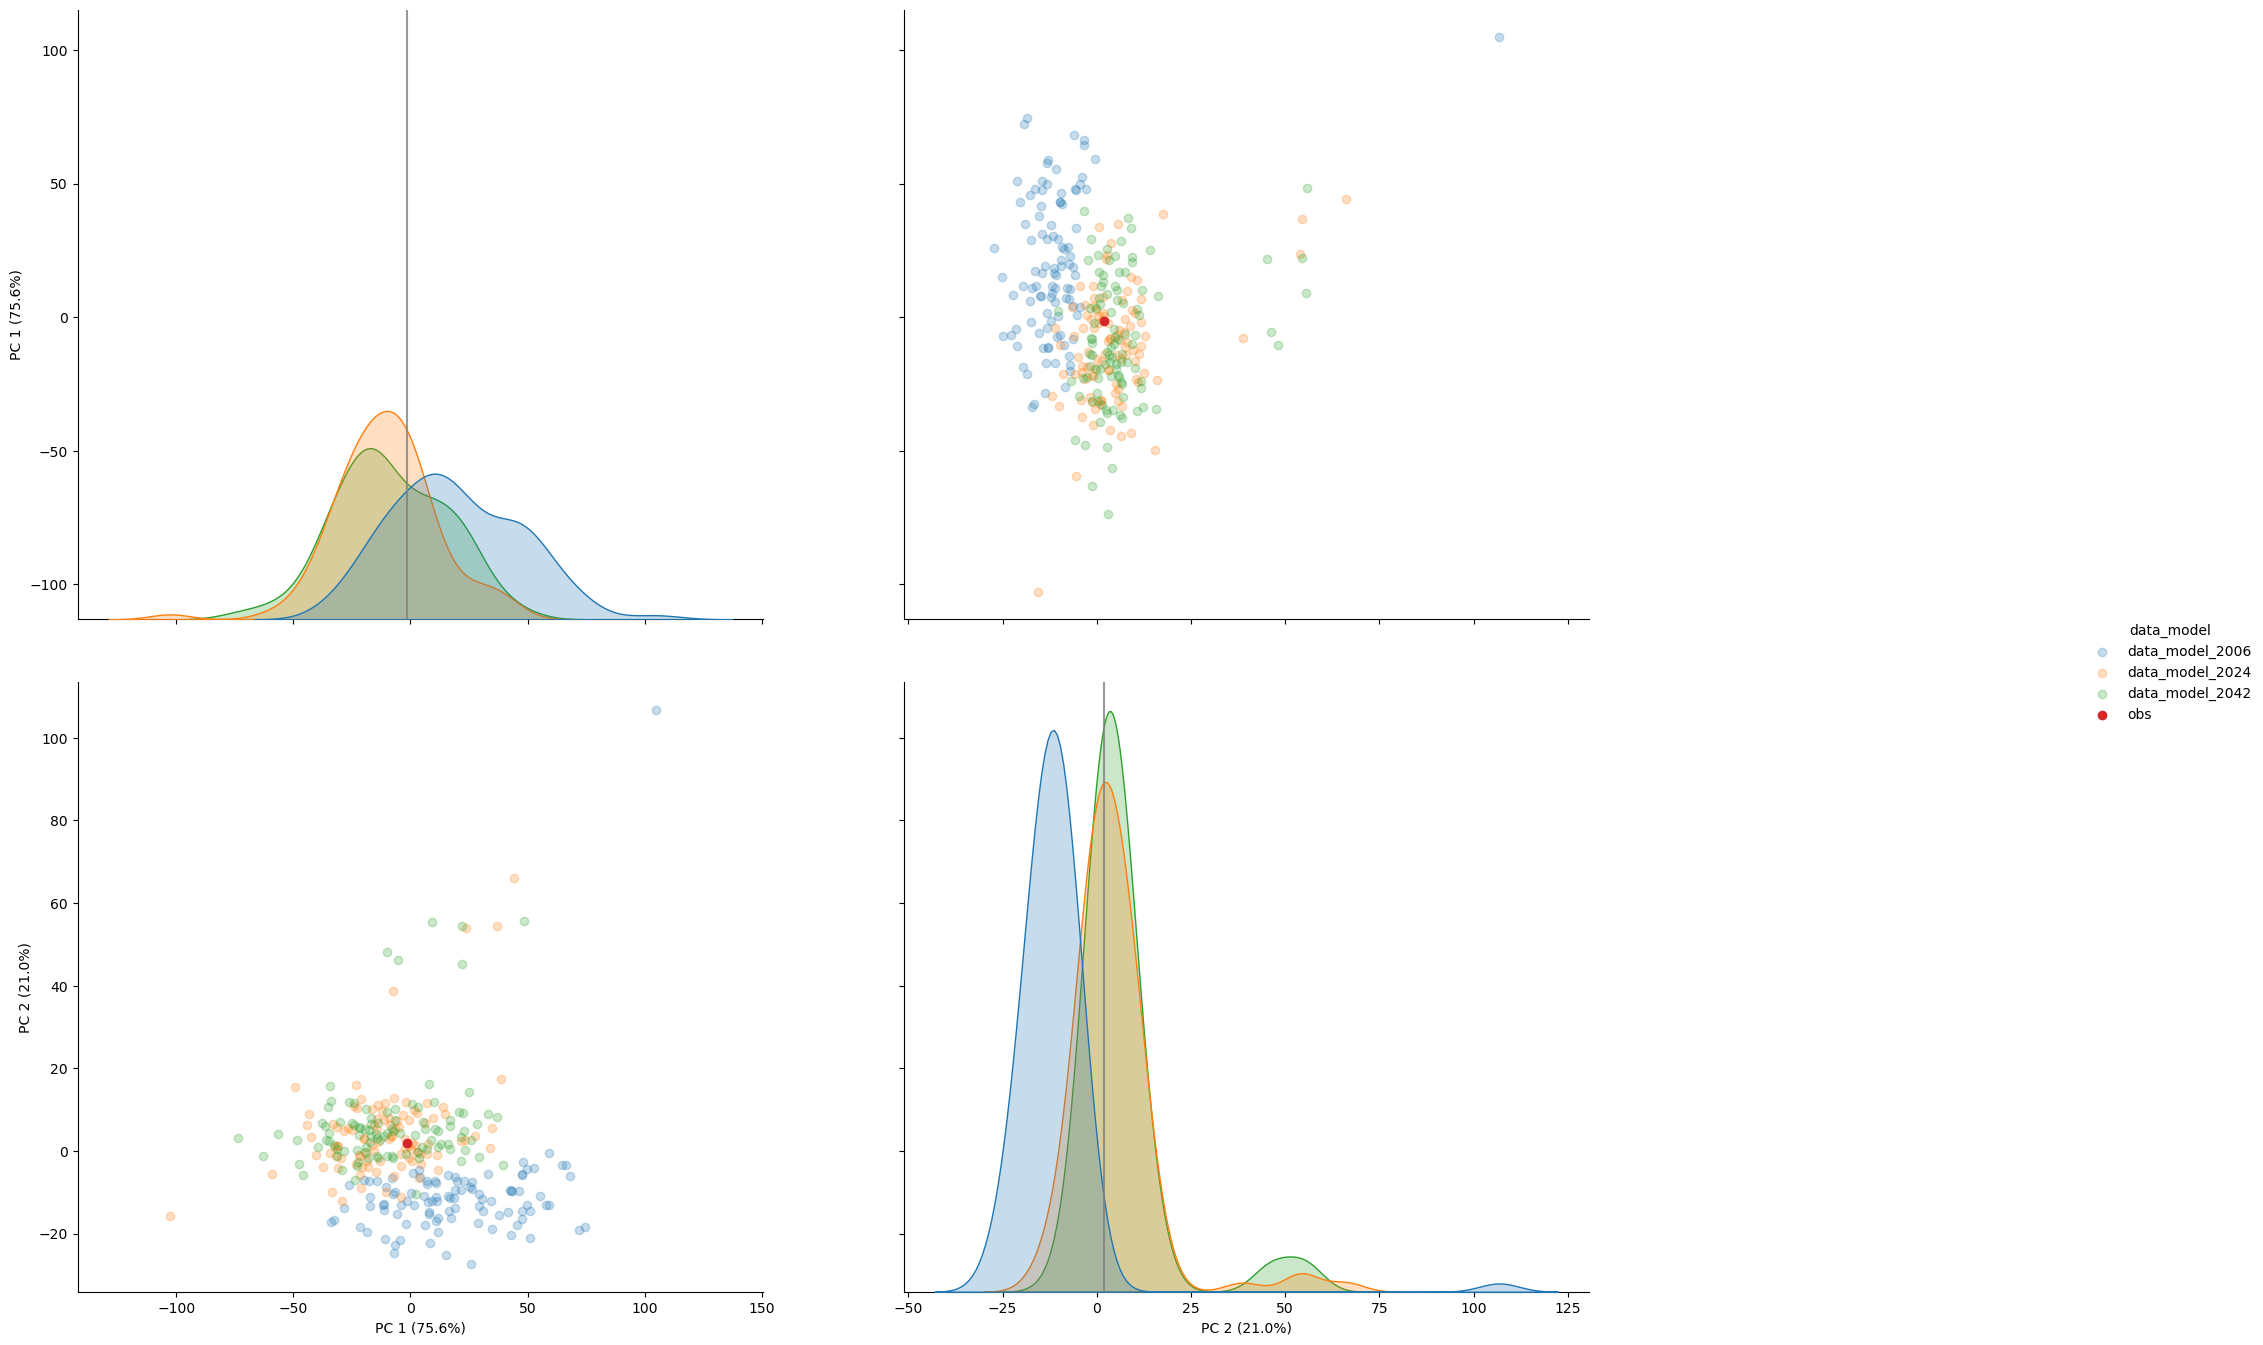

In [ ]:
mmm.plot_gofs_PCA_components(pca_n_components=2)

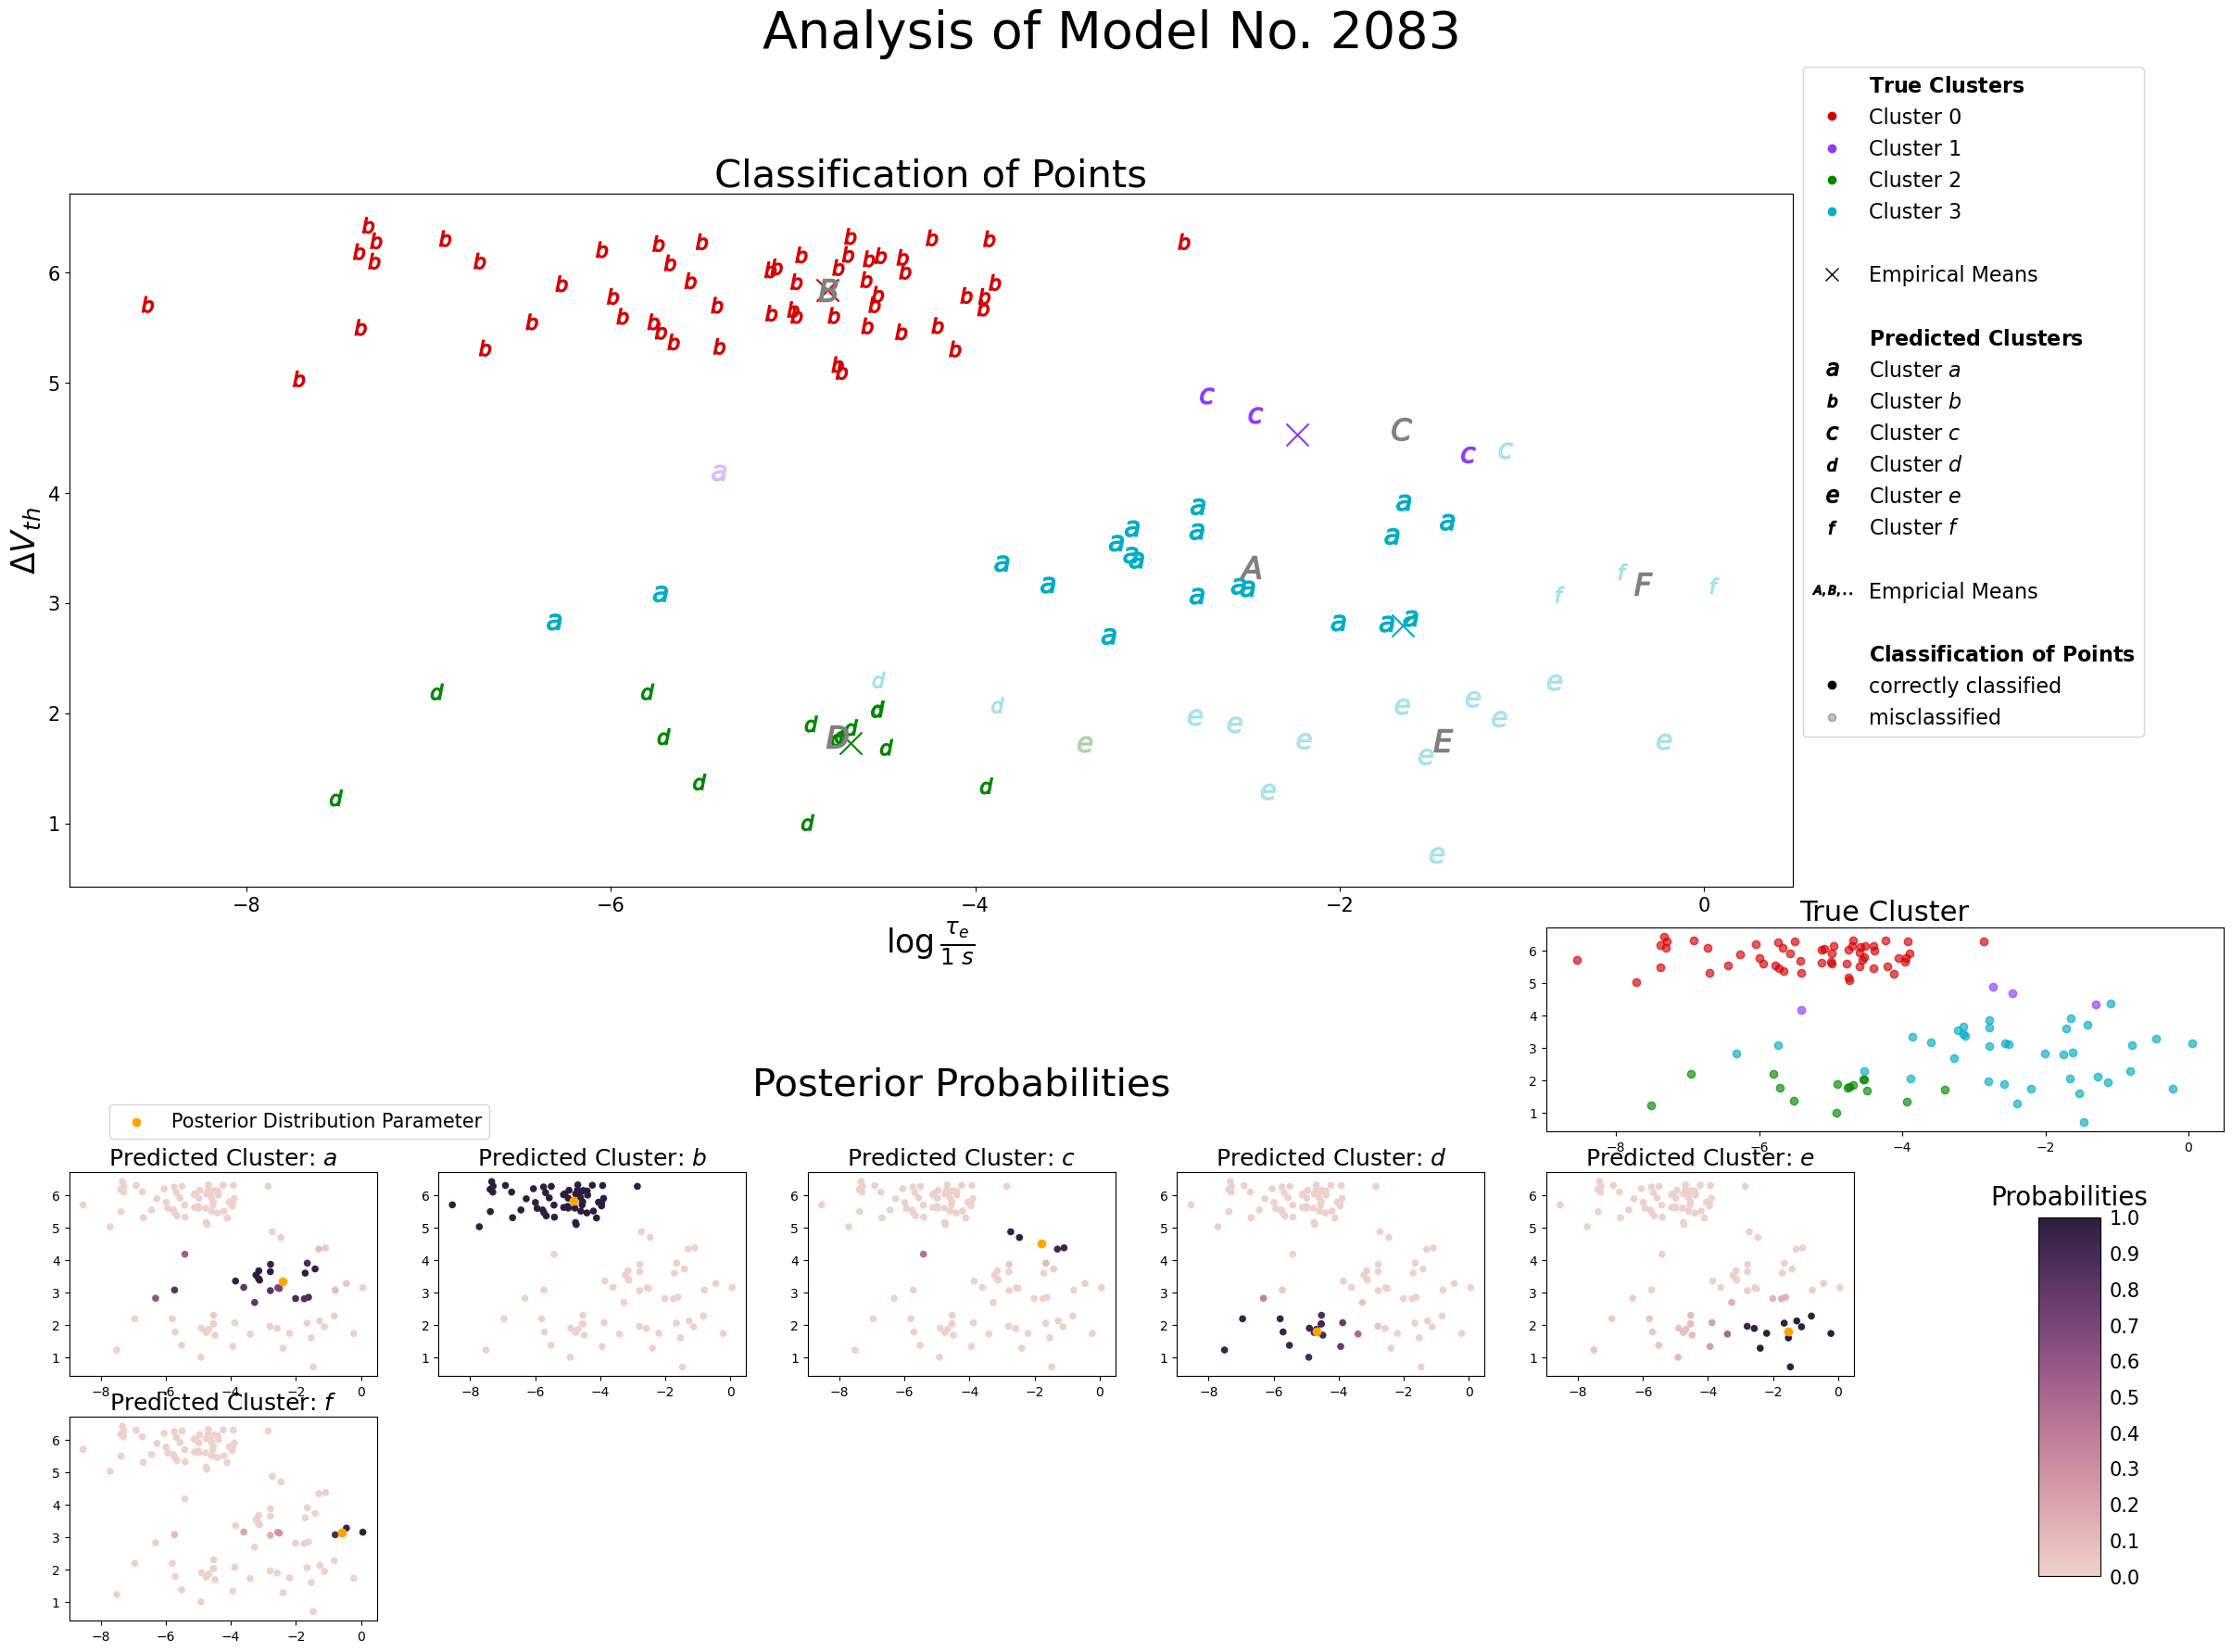

In [ ]:
from plotting.clustering_assessment.plot import plot_clustering_assessment

model_idx = 2083
# criterion = "TOTAL_rank"

plot_clustering_assessment(model_data, df_scores, model_idx)

In [ ]:
[6028, 6006, 6074]

[6028, 6006, 6074]

In [ ]:
pd.set_option("display.max_columns", None)
# cols = [ 'param_index', 'll', 'AIC', 'BIC', 'silhouette', 'll_rank', 'AIC_rank', 'BIC_rank',"TOTAL_rank", 'silhouette_rank',"CH_rank", 'identified_cluster', "N_cluster",'True_Cluster_number']
dataset = 75
init_routine = "random_inside"
criterion = "Total_rank_rank"

df_select = df_scores.loc[(df_scores.dataset == dataset) & (df_scores.init_routine == init_routine), :].sort_values(
    criterion
)
# df_select = df_select[df_select.identified_cluster == df_select.identified_cluster.max()]
print(f"best model: {int(df_select.number_identified_cluster.max())} identified clusters")
df_select.iloc[0:100]

best model: 5 identified clusters


,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank,number_identified_cluster,adjusted_rand_score
13546,13546,1000,3.196398,3.196398,1000,46,0,75,random_inside,3,6,173.732346,-161.732346,-139.923608,-149.617391,0.354210,219.492419,0.778254,2,1,1,1,1,95,59,101,1,2.0,0.564495
13542,13542,1000,2.905300,2.905300,1000,42,0,75,random_inside,3,6,173.731992,-161.731992,-139.923254,-149.617032,0.354210,219.492419,0.778254,3,2,2,4,1,95,61,107,2,2.0,0.564495
13543,13543,1000,3.842465,3.845891,1002,43,2,75,random_inside,3,6,173.731990,-161.731990,-139.923253,-149.617051,0.354210,219.492419,0.778254,4,3,3,2,1,95,60,108,3,2.0,0.564495
13541,13541,1000,3.678787,3.678787,1000,41,0,75,random_inside,3,6,173.731962,-161.731962,-139.923224,-149.617038,0.354210,219.492419,0.778254,5,4,4,3,1,95,62,112,4,2.0,0.564495
13554,13554,1000,4.475962,4.487840,1004,54,4,75,random_inside,3,6,173.731708,-161.731708,-139.922970,-149.616777,0.354210,219.492419,0.778254,6,5,5,6,1,95,63,118,5,2.0,0.564495
13540,13540,1000,3.589091,3.589091,1000,40,0,75,random_inside,3,6,173.731702,-161.731702,-139.922965,-149.616778,0.354210,219.492419,0.778254,7,6,6,5,1,95,64,120,6,2.0,0.564495
13553,13553,1000,3.410007,3.413203,1002,53,2,75,random_inside,3,6,173.731603,-161.731603,-139.922865,-149.616667,0.354210,219.492419,0.778254,8,7,7,7,1,95,65,125,7,2.0,0.564495
13547,13547,1000,4.582471,4.582471,1000,47,0,75,random_inside,3,6,173.731587,-161.731587,-139.922850,-149.616645,0.354210,219.492419,0.778254,9,8,8,8,1,95,66,129,8,2.0,0.564495
13549,13549,1000,5.487367,5.489299,1001,49,1,75,random_inside,3,6,173.731548,-161.731548,-139.922810,-149.616630,0.354210,219.492419,0.778254,10,9,9,9,1,95,67,133,9,2.0,0.564495
13552,13552,1000,3.312869,3.316629,1002,52,2,75,random_inside,3,6,173.731539,-161.731539,-139.922802,-149.616629,0.354210,219.492419,0.778254,11,10,10,10,1,95,68,137,10,2.0,0.564495
